In [12]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
physical_devices = tf.config.list_physical_devices('GPU') 
try: 
  tf.config.experimental.set_memory_growth(physical_devices[0], True) 
except: 
  # Invalid device or cannot modify virtual devices once initialized. 
  pass 

In [3]:
data = pd.read_csv("data.txt", delimiter=' ', header=None, skiprows=1, names=['c1','c2','c3','c4','c5', 'c6'])
# data = pd.read_csv( 'data.txt' )
data.head()
# print(len(data))

c1     c2     c3     c4     c5      c6
0  47.88   8.39  49.29   6.31 -37.27  304.84
1  11.42 -46.21  -5.55 -15.94  25.05 -168.82
2  17.83   9.05  24.55 -42.49  37.12  196.37
3  41.77 -49.00 -42.52  37.32 -14.91 -296.75
4  34.34  -0.67  24.90  35.26  17.59   55.59

In [5]:
train_dataset = data.sample(frac=0.8,random_state=0)
test_dataset = data.drop(train_dataset.index)

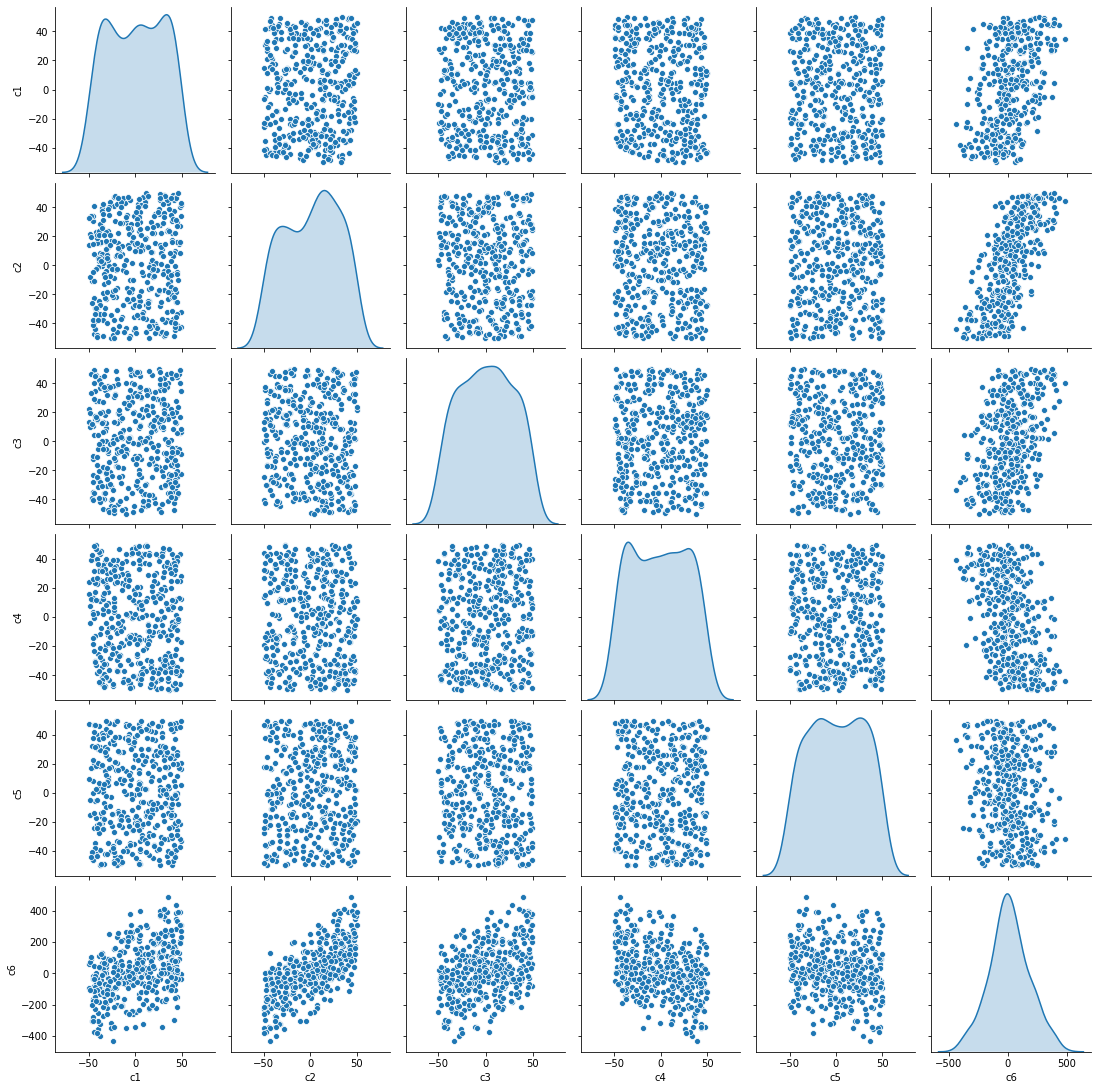

In [13]:
sns.pairplot(train_dataset[["c1", "c2", "c3", "c4", "c5", "c6"]], diag_kind="kde")

In [19]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

count       mean         std     min     25%    50%       75%     max
c1  398.0   1.097789   29.510239  -49.82 -26.175  2.860   27.8825   49.53
c2  398.0   1.583266   29.109603  -49.99 -23.995  4.995   25.7900   49.85
c3  398.0   1.142915   28.069657  -49.91 -22.730  0.810   24.3975   49.81
c4  398.0  -1.241633   29.674994  -49.86 -29.410 -0.590   25.1350   49.48
c5  398.0   1.136432   29.586447  -49.97 -23.135  1.615   26.5500   49.96
c6  398.0  16.304221  168.390424 -434.27 -89.295  7.970  124.0325  489.87

In [20]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [22]:
def build_model():
    model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)
# or could use adam optimizer
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model
model = build_model()

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


In [24]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.25502348],
       [-0.2528602 ],
       [ 0.15776916],
       [ 0.14211784],
       [ 0.14858162],
       [ 0.29193777],
       [ 0.1377937 ],
       [-0.000563  ],
       [-0.18801409],
       [ 0.16045646]], dtype=float32)

In [27]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, ["c1","c2", "c3", "c4", "c5","c6"],
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])

ValueError: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, (<class 'list'> containing values of types {"<class 'str'>"})